# Clustering

## Dataset

We‘ll use "201707-citibike-tripdata.csv.zip" (after preprocessed in HW0)

## Schema

- Every station’s information
    - id, name, lat, lng
- Every stations’ flow data
    - id, time, in-flow, out-flow

### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import os
from time import time
from plotly.graph_objs import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from sklearn import manifold
%matplotlib inline

### Read csv to dataframe
use pandas to read data

In [3]:
# preprocessed dataset
df = pd.read_csv('./201707-citibike-tripdata-preprocessed.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [4]:
# every station's information
station_info = pd.read_csv('./station_info.csv')
station_info.head()

,station id,station name,station latitude,station logitude
0,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241
1,293,Lafayette St & E 8 St,40.730207,-73.991026
2,3242,Schermerhorn St & Court St,40.691029,-73.991834
3,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198
4,361,Allen St & Hester St,40.716059,-73.991908


In [5]:
# every station's in-flow data
station_in_flow = pd.read_csv('./in_flow.csv')
station_in_flow.head()

,72,79,82,83,116,119,120,127,128,143,...,2003,2005,2006,2008,2009,2010,2012,2021,2022,2023
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0
2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# every station's out-flow data
station_out_flow = pd.read_csv('./out_flow.csv')
station_out_flow.head()

,72,79,82,83,116,119,120,127,128,143,...,2003,2005,2006,2008,2009,2010,2012,2021,2022,2023
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Spatial clustering

Using stations’ geo-information to do clustering,try the following algorithm and try different parameters and explain the results

### Station geo-information data

Select station logitude and latitude from station_info

In [7]:
station_geo = station_info[['station logitude', 'station latitude']]
station_geo.head()

,station logitude,station latitude
0,-73.960241,40.715348
1,-73.991026,40.730207
2,-73.991834,40.691029
3,-73.963198,40.716887
4,-73.991908,40.716059


In [8]:
station_geo.describe()

,station logitude,station latitude
count,634.000000,634.000000
mean,-73.979194,40.727318
std,0.021919,0.036300
min,-74.066921,40.655400
25%,-73.994128,40.696093
50%,-73.981324,40.724055
75%,-73.961923,40.754918
max,-73.896602,40.880921


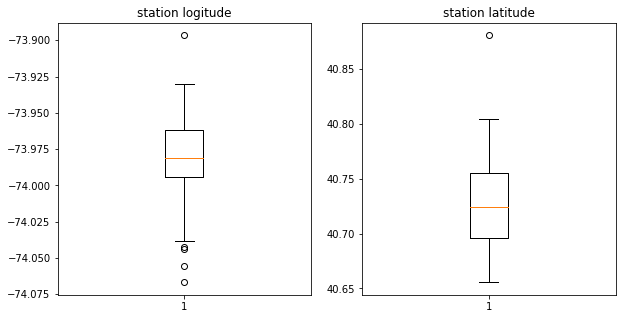

In [9]:
def show_box(df):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
    i = 1
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64:
            ax = plt.subplot(1, 2, i)
            plt.boxplot(df[col])
            ax.set_title(col)
            i += 1
    plt.show()

show_box(station_geo)

### Kmeans

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

The problem is computationally difficult (NP-hard); however, there are efficient heuristic algorithms that are commonly employed and converge quickly to a local optimum. These are usually similar to the expectation-maximization algorithm for mixtures of Gaussian distributions via an iterative refinement approach employed by both algorithms. Additionally, they both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.

The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means because of the k in the name. One can apply the 1-nearest neighbor classifier on the cluster centers obtained by k-means to classify new data into the existing clusters. This is known as nearest centroid classifier or Rocchio algorithm.

In [16]:
def test_Kmeans(data, n_clusters):
    X = data
    X = StandardScaler().fit_transform(X)
    t0 = time()
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(X)
    print("K : %s" % (n_clusters))
    print("time : %.6fs" % (time() - t0))
    labels = kmeans.labels_
    plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
    plt.show()

Do standarlize the stations' geo-information data because the original logitude and latitude values are so close. If using original data could make the bad clustering result.

K : 3
time : 0.055951s


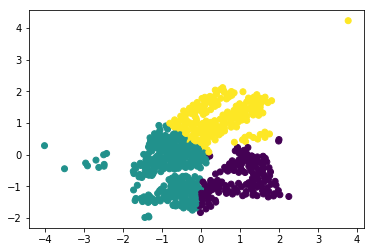

K : 4
time : 0.036267s


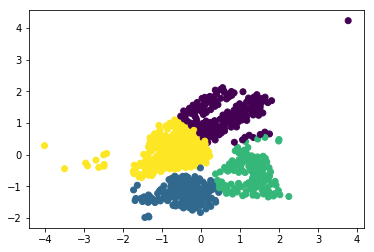

K : 5
time : 0.053233s


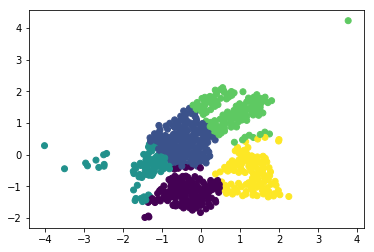

In [17]:
for i in xrange(3, 6):
    test_Kmeans(station_geo, i)

#### Observation and Compare

With K equals to 4, it looks like the distribution of bike docks; the time it took is the least.

![](https://i.imgur.com/klhnwbJ.png)

And the others are more general and specific classification of the bike docks in geomartery.

It is interesting that the time of clustering is NOT increasing by K. I think it would because of the iteration times of neighbors.

### DBscan

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

In 2014, the algorithm was awarded the test of time award (an award given to algorithms which have received substantial attention in theory and practice) at the leading data mining conference, KDD.

In [63]:
def test_DBscan(data, eps, min_samples, metric):
    print("eps : %s" % (eps))
    print("min_samples : %s" % (min_samples))
    # #############################################################################
    # Load data and standardize the value
    X = data
    X = StandardScaler().fit_transform(X)

    # #############################################################################
    # Compute DBSCAN
    t0 = time()
    db = DBSCAN(eps = eps, min_samples = min_samples, metric = metric).fit(X)
    print("time : %.6fs" % (time() - t0))
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print('Estimated number of clusters: %d' % n_clusters_)

    # #############################################################################
    # Plot result
    # Black removed and is used for noise instead
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=8)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=2)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

Also do standarlize the stations' geo-information data because the original logitude and latitude values are so close. If using original data could make the bad clustering result.

eps : 0.2
min_samples : 8
time : 0.478662s
Estimated number of clusters: 22


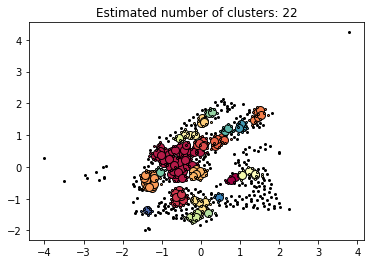

eps : 0.2
min_samples : 8
time : 2.017030s
Estimated number of clusters: 6


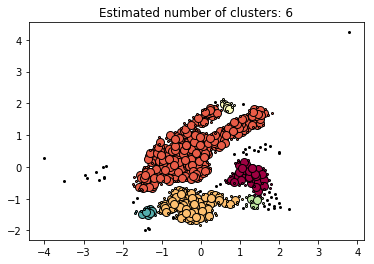

eps : 0.3
min_samples : 2
time : 0.544527s
Estimated number of clusters: 7


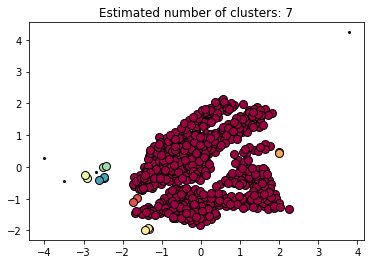

eps : 0.3
min_samples : 2
time : 2.226627s
Estimated number of clusters: 4


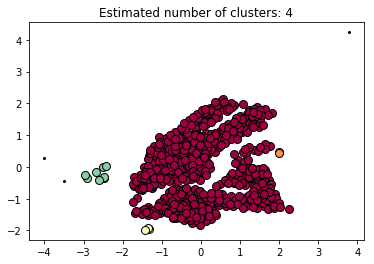

eps : 0.2
min_samples : 2
time : 0.484147s
Estimated number of clusters: 13


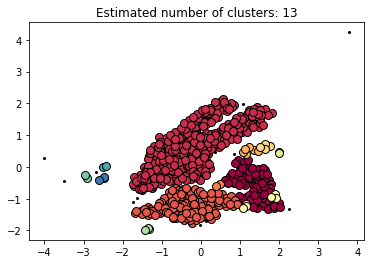

eps : 0.2
min_samples : 2
time : 2.021961s
Estimated number of clusters: 8


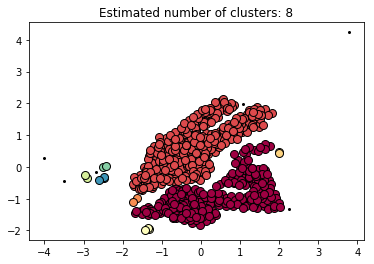

eps : 0.3
min_samples : 3
time : 0.554392s
Estimated number of clusters: 3


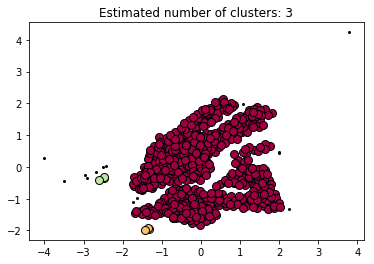

eps : 0.3
min_samples : 3
time : 2.289683s
Estimated number of clusters: 3


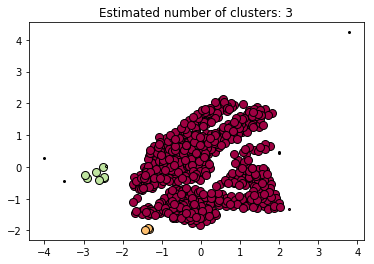

In [73]:
manhattan = lambda X, Y: abs(X - Y).sum()
euclidean = lambda X, Y: distance.euclidean(X, Y)

test_DBscan(station_geo, 0.2, 8, manhattan)
test_DBscan(station_geo, 0.2, 8, euclidean)
test_DBscan(station_geo, 0.3, 2, manhattan)
test_DBscan(station_geo, 0.3, 2, euclidean)
test_DBscan(station_geo, 0.2, 2, manhattan)
test_DBscan(station_geo, 0.2, 2, euclidean)
test_DBscan(station_geo, 0.3, 3, manhattan)
test_DBscan(station_geo, 0.3, 3, euclidean)

#### Observation and Comparison

When eps and min_sample are fixed, the result of clustering with euclidean metric is more reasonable. It would not over clustering.

Eps is set to low so the maximum distance between two samples could be low; which can cluster more sensible not too specific.
All min_sample are small because the station is so close that it clusters to 1 when min_sample is high.

Compared with Kmeans, the average time of DBscan took is more; even it uses the simple distance function like manhattan.

All the results of DBscan are too specific because it's clustering is based on density; and the location of stations are so intensive at some area cause it cluster many station into one.

## Temporal clustering

Using the in-flow and out-flow data in the first week(7 days * 48 segment * 2 = 672 data points for each sensor) try the following methods

In [75]:
tmp_in_flow = pd.DataFrame(station_in_flow.head(n = 7 * 48))
tmp_out_flow = pd.DataFrame(station_out_flow.head(n = 7 * 48))

tmp_in_flow.head()

,72,79,82,83,116,119,120,127,128,143,...,2003,2005,2006,2008,2009,2010,2012,2021,2022,2023
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0
2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
tmp_out_flow.head()

,72,79,82,83,116,119,120,127,128,143,...,2003,2005,2006,2008,2009,2010,2012,2021,2022,2023
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Agglomerative Clustering

This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

Agglomerative hierarchical clustering is a bottom-up clustering method where clusters have sub-clusters, which in turn have sub-clusters, etc. The classic example of this is species taxonomy. Gene expression data might also exhibit this hierarchical quality (e.g. neurotransmitter gene families). Agglomerative hierarchical clustering starts with every single object (gene or sample) in a single cluster. Then, in each successive iteration, it agglomerates (merges) the closest pair of clusters by satisfying some similarity criteria, until all of the data is in one cluster.

The hierarchy within the final cluster has the following properties:

- Clusters generated in early stages are nested in those generated in later stages.
- Clusters with different sizes in the tree can be valuable for discovery.

In [108]:
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], '0',
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

def test_Agg(data, linkage, n_clusters, affinity):
    X = data
    X_red = manifold.SpectralEmbedding(n_components = 2).fit_transform(X)
    
    clustering = AgglomerativeClustering(linkage = linkage, n_clusters = n_clusters, affinity = affinity)
    t0 = time()
    clustering.fit(X_red)
    print("Estimated number of clusters: %s" % len(set(clustering.labels_)))
    print("time : %.6fs" % (time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s affinity" % affinity)
    plt.show()

// add some ex

Estimated number of clusters: 3
time : 0.002369s


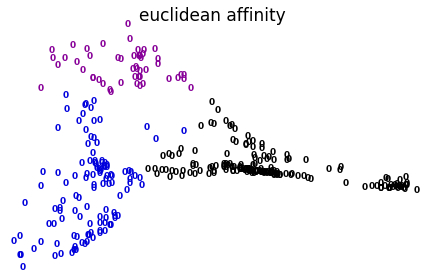

Estimated number of clusters: 3
time : 0.002334s


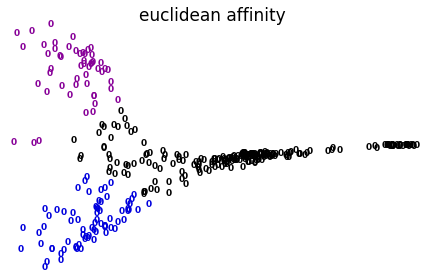

Estimated number of clusters: 3
time : 0.002638s


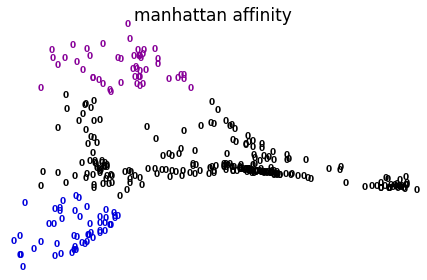

Estimated number of clusters: 3
time : 0.002300s


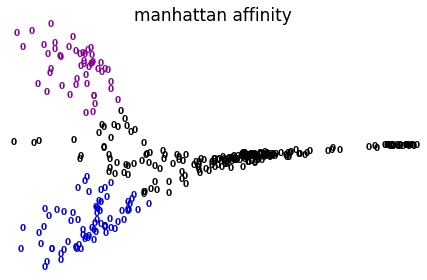

In [109]:
for affinity in ['euclidean', 'manhattan']:
    test_Agg(tmp_in_flow, 'average', 3, affinity)
    test_Agg(tmp_out_flow, 'average', 3, affinity)

#### Observation and Comparison

### PCA => Agglomerative Clustering

PCA can be thought of as fitting an n-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipsoid is small, then the variance along that axis is also small, and by omitting that axis and its corresponding principal component from our representation of the dataset, we lose only a commensurately small amount of information.

To find the axes of the ellipsoid, we must first subtract the mean of each variable from the dataset to center the data around the origin. Then, we compute the covariance matrix of the data, and calculate the eigenvalues and corresponding eigenvectors of this covariance matrix. Then we must normalize each of the orthogonal eigenvectors to become unit vectors. Once this is done, each of the mutually orthogonal, unit eigenvectors can be interpreted as an axis of the ellipsoid fitted to the data. This choice of basis will transform our covariance matrix into a diagonalised form with the diagonal elements representing the variance of each axis . The proportion of the variance that each eigenvector represents can be calculated by dividing the eigenvalue corresponding to that eigenvector by the sum of all eigenvalues.

This procedure is sensitive to the scaling of the data, and there is no consensus as to how to best scale the data to obtain optimal results.

In [110]:
def test_PCA_Agg(data, n_components, linkage, n_clusters, affinity):
    X = data
    pca = PCA(n_components = n_components)
    X = pca.fit(X).transform(X)
    test_Agg(X, linkage, n_clusters, affinity)

// add some ex

Estimated number of clusters: 3
time : 0.002110s


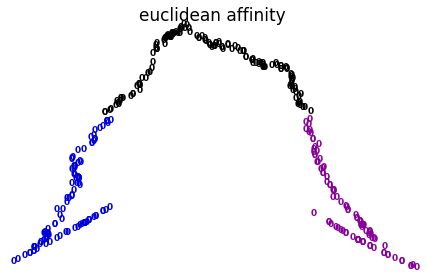

Estimated number of clusters: 3
time : 0.002102s


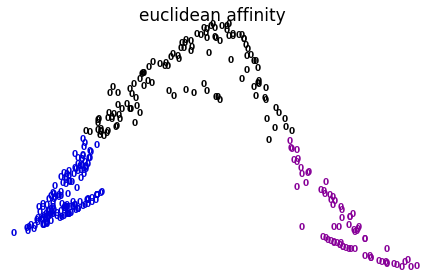

Estimated number of clusters: 3
time : 0.002121s


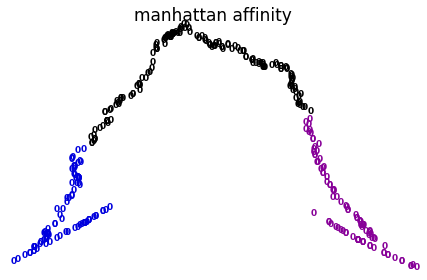

Estimated number of clusters: 3
time : 0.002219s


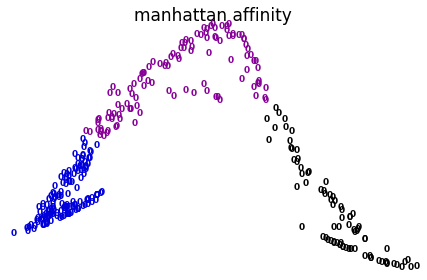

In [117]:
for affinity in ['euclidean', 'manhattan']:
    test_PCA_Agg(tmp_in_flow, 0.3, 'average', 3, affinity)
    test_PCA_Agg(tmp_out_flow, 0.5, 'average', 3, affinity)

#### Observation and Comparison

## Other